In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_parquet('../result.parquet')
df.head()

,bleu,reference_length,translation_length,rouge1_fmeasure,rouge2_fmeasure,rougeL_fmeasure,rougeLsum_fmeasure,original_texts,predictions,references,time,cosine_similarities
0,0.226643,403,426,1.0,1.0,1.0,0.838710,"○己未/賜成均四部學堂生徒酒果。 ○命議政府禮曹及慣習都監提調, 觀新樂于中部, 遣都承旨李...",4부 학당(學堂)의 생도(生徒)에게 술과 과일을 하교하였다. 의정부와 예조 및 훈습...,성균(成均)·사부 학당(四部學堂)의 생도들에게 주과(酒果)를 내려 주었다. 의정부·...,58.509086,0.920043
1,0.190375,560,333,1.0,1.0,1.0,0.800000,"○丙申/奏聞使通事康文寶、二運管押使通事李彩等, 先來啓有賞賜, 各賜衣一襲。 ○丁酉/傳旨...","1. 주문사 통시(通事) 한문보(韓文寶), 이운 관파(二運管押) 통시(通辭) 이채(...",주문사(奏聞使)의 통사(通事)인 강문보(康文寶)와 두 번째 운(運)의 관압사(管押使...,42.562067,0.897585
2,0.087427,774,1051,1.0,1.0,1.0,0.986301,"○(司諫院啓曰: ""三陟乃嶺東雄府, 而近者屢經非人, 殘弊已極。 新府使金繼燾, 爲人迂拙...","3품을 높이자, 이곳은 울릉해 동쪽에 있는 호도의 영신부라 하였는데, 근래에는 비범...","〈사간원이 아뢰기를, ""삼척(三陟)은 곧 영동(嶺東)의 큰 고을입니다. 그런데 근자...",172.375862,0.803160
3,0.185865,709,836,1.0,1.0,1.0,0.760563,"○甲戌/平安道 龍岡縣有赤筒堤堰, 灌民田數千頃, 爲淑徽公主家所折受, 將破堤作田, 道臣...",9일에 잔치를 하다가 손가락을 부르리로 인해 통증이 계속되면서 몸통에서 불타는 것까...,평안도 용강현(龍岡縣)에 적통지(赤筒池) 방죽이 있었는데 백성의 전지 수천 경(頃)...,121.663177,0.775825
4,0.050424,422,1057,1.0,1.0,1.0,0.857143,"○傳曰: ""綵棚造設事, 下敎已久, 而別無擧行之實。 又無回啓之事, 未知何故。"" 【정족...",2차 판서와 참판을 빨리 검수하라 하였다. 【정족산 사고본】 18책 121면【국편 ...,"전교하였다. ""채붕(綵棚)을 만들어 설치하라는 일을 하교한 지 이미 오래되었는데도 ...",163.047685,0.753290


In [3]:
df.columns

Index(['bleu', 'reference_length', 'translation_length', 'rouge1_fmeasure',
       'rouge2_fmeasure', 'rougeL_fmeasure', 'rougeLsum_fmeasure',
       'original_texts', 'predictions', 'references', 'time',
       'cosine_similarities'],
      dtype='object')

In [4]:
df['original_length'] = df['original_texts'].str.len()

<Axes: ylabel='Frequency'>

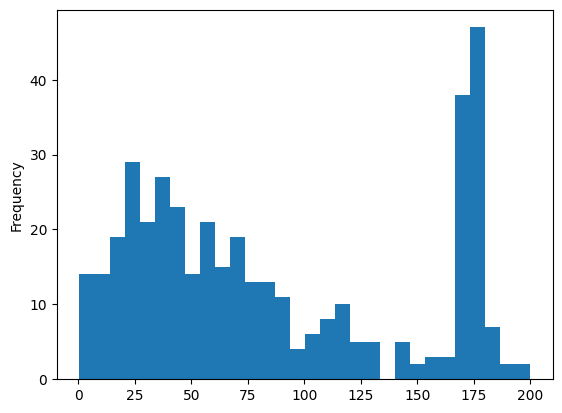

In [5]:
df['time'].plot.hist(bins=30)

In [6]:
df['rougeLsum_fmeasure'].describe()

count    400.000000
mean       0.776260
std        0.218761
min        0.016529
25%        0.666667
50%        0.855655
75%        0.933333
max        1.000000
Name: rougeLsum_fmeasure, dtype: float64

<Axes: ylabel='Frequency'>

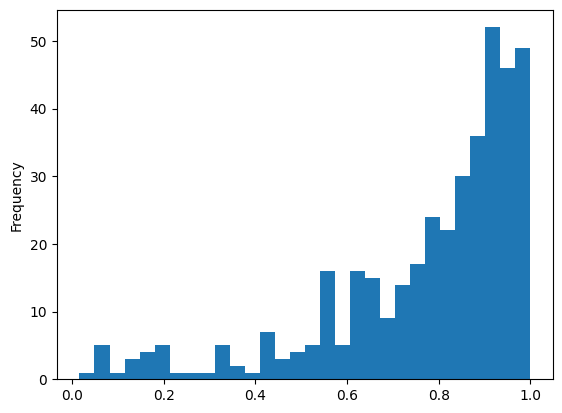

In [7]:
df['rougeLsum_fmeasure'].plot.hist(bins=30)

In [8]:
df[['original_length', 'cosine_similarities', 'rougeLsum_fmeasure']].corr()

,original_length,cosine_similarities,rougeLsum_fmeasure
original_length,1.000000,0.123813,0.134348
cosine_similarities,0.123813,1.000000,0.611511
rougeLsum_fmeasure,0.134348,0.611511,1.000000


<Axes: >

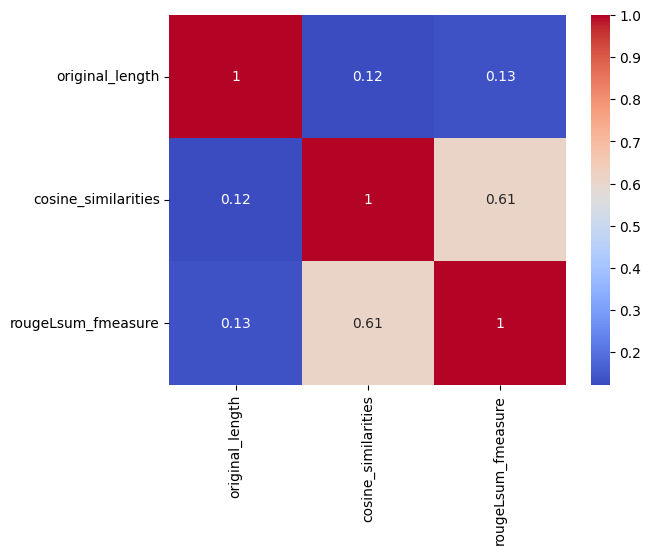

In [9]:
sns.heatmap(df[['original_length', 'cosine_similarities', 'rougeLsum_fmeasure']].corr(), cmap='coolwarm', annot=True)

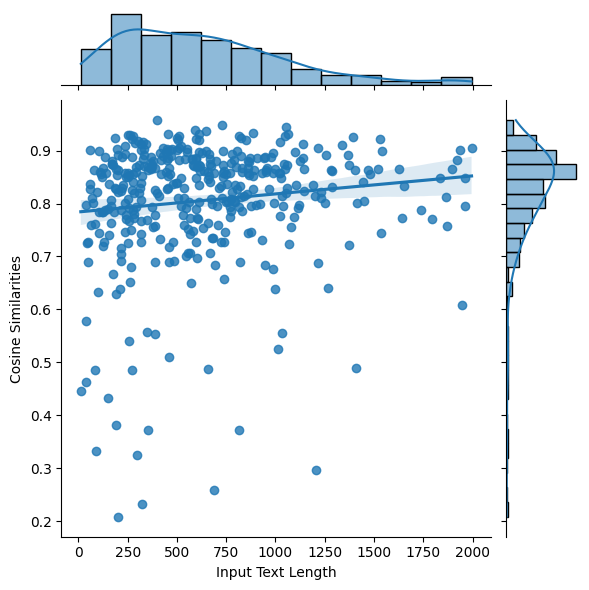

In [10]:
sns.jointplot(
    df[['original_length', 'cosine_similarities']]
        .rename(columns={'cosine_similarities': 'Cosine Similarities', 'original_length': 'Input Text Length'}), 
    x='Input Text Length', 
    y='Cosine Similarities', 
    kind='reg',
    palette=sns.color_palette()
)

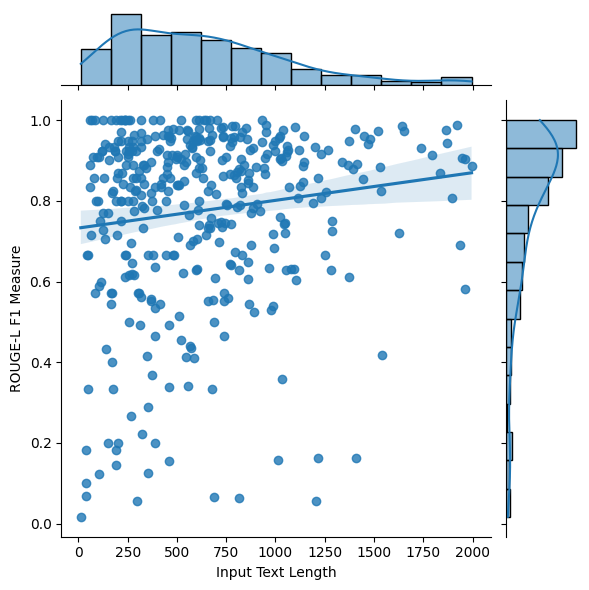

In [11]:
ax = sns.jointplot(
    df[['original_length', 'rougeLsum_fmeasure']]
        .rename(columns={'rougeLsum_fmeasure': 'ROUGE-L F1 Measure', 'original_length': 'Input Text Length'}), 
    x='Input Text Length', 
    y='ROUGE-L F1 Measure', 
    kind='reg',
    palette=sns.color_palette(),
)

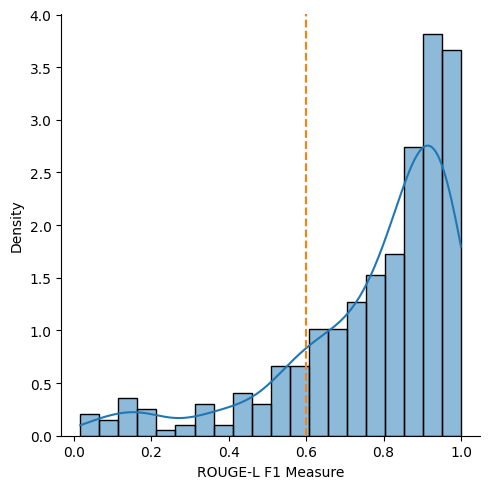

In [12]:
grid = sns.displot(df['rougeLsum_fmeasure'], kind='hist', kde=True, stat='density', bins=20)
grid.ax.set_xlabel('ROUGE-L F1 Measure')
grid.refline(x=0.6, linestyle='--', color=sns.color_palette()[1])

<Axes: ylabel='Frequency'>

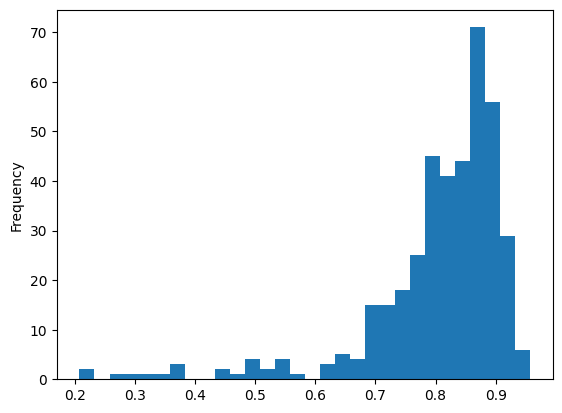

In [13]:
df['cosine_similarities'].plot.hist(bins=30)

Text(0.5, 29.140624999999986, 'Cosine Similarities')

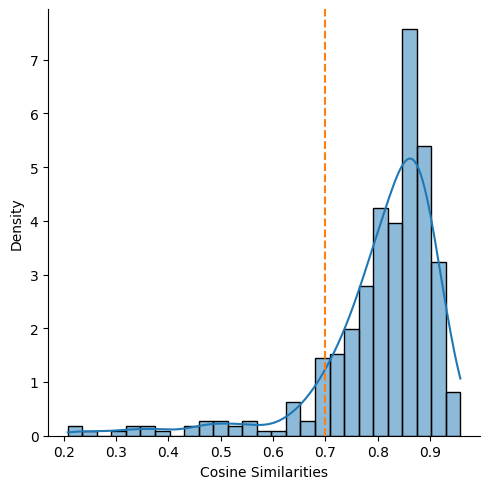

In [14]:
grid = sns.displot(df['cosine_similarities'], kind='hist', kde=True, stat='density')
grid.refline(x=0.7, linestyle='--', color=sns.color_palette()[1])
grid.ax.set_xlabel('Cosine Similarities')

<Axes: xlabel='cosine_similarities', ylabel='Density'>

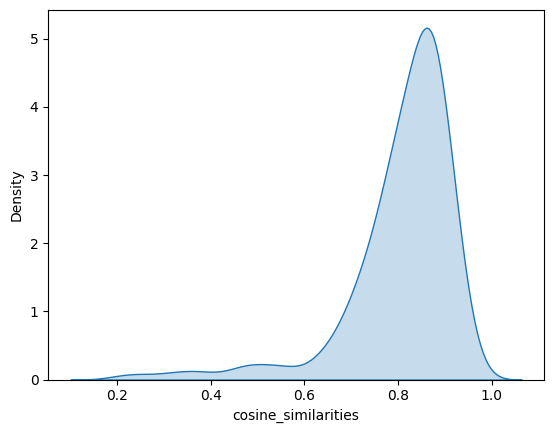

In [15]:
sns.kdeplot(df['cosine_similarities'], fill=True)

In [16]:
df['cosine_similarities'].describe()

count    400.000000
mean       0.805808
std        0.117749
min        0.207927
25%        0.773264
50%        0.835746
75%        0.877133
max        0.957554
Name: cosine_similarities, dtype: float64

In [17]:
print(df['original_texts'][0])

○己未/賜成均四部學堂生徒酒果。 ○命議政府禮曹及慣習都監提調, 觀新樂于中部, 遣都承旨李思哲, 賜宣醞。 ○庚申/議政府六曹改定下三道監司及敬差官所報年分, 多從高等, 民甚怨之。 ○辛酉/司諫院啓: "向者內醫等, 於東宮發腫之時, 不能救藥, 至使受朝參拜表, 動勞發毒, 其罪不小, 請論如法。" 上曰: "予當審處之。" ○壬戌/司諫院右司諫金新民等上疏曰:
頃者安崇善負欺詐專擅之罪, 律該極刑, 殿下不忍加誅, 特從末減, 置之極邊, 纔經一稔, 恩出不意, 又移近畿, 遠近聞者, 莫不駭愕。 崇善之心, 寧復有再荷非常之恩哉! 頃以東宮未寧, 放赦徒流, 崇善亦與焉。 如崇善者, 蔽人主之聰, 竊人主之權, 欺詐誣罔, 專擅自恣, 無狀之尤者也。 借使末減免死, 當常置配所, 不得之他, 亦云幸矣, 今而前件罪愆, 一皆洗滌, 於京於外, 靦面往來, 臣等恐後日之如崇善者亦從此而起矣。 伏望恢廓剛斷, 收還是命。 不允。 【태백산사고본】 39책 126권 9장 A면【국편영인본】 5책 153면 【분류】사법-행형(行刑) / 정론-정론(政論) / 정론-간쟁(諫諍)
不允。


In [18]:
print(df['references'][0])

성균(成均)·사부 학당(四部學堂)의 생도들에게 주과(酒果)를 내려 주었다. 의정부·예조 및 관습 도감(慣習都監) 제조(提調)에게 명하여 신악(新樂)을 중부(中部)에서 보게 하고, 도승지 이사철(李思哲)을 보내어 선온(宣醞)을 내려 주었다. 의정부와 육조(六曹)에서 하삼도(下三道)의 감사(監司)와 경차관(敬差官)이 보고한 (연분(年分)083)) 을 개정하였는데, 많이 등급이 높은 것을 좇았으므로 백성들이 매우 이를 원망하였다. 사간원에서 아뢰기를,
"지난번 내의(內醫) 등이 동궁께서 종기가 났을 때, 능히 약으로 구료하지 못하고, 조참(朝參)을 받고 배표(拜表)까지 하게 하여, 움직이고 괴롭게 함으로써 독이 나게 하였습니다. 그 죄가 작지 아니하오니, 청하옵건대, 법대로 논죄하게 하옵소서."
하니, 임금이 말하기를,
"내 마땅히 살펴서 이를 처리하겠다."
하였다. 사간원 우사간 김신민(金新民) 등이 상소(上疏)하기를,
"지난번에 안숭선(安崇善)이 사기(詐欺)와 함부로 천단한 죄를 져서, 형률이 극형에 해당되었으나, 전하께서는 차마 죄주지 못하시고 특별히 말감(末減)을 따라 극변(極邊)에 두온 지 겨우 1년이 되었사온데, 은혜가 뜻밖에 나와 또한 근기(近畿)로 옮기게 하시오니, 원근(遠近)에서 듣는 사람마다 놀라지 아니함이 없사옵니다. 숭선(崇善)의 마음으로도 어찌 다시 보통이 아닌 은혜를 입을 것을 뜻하였겠습니까만, 저번에 동궁께서 미령(未寧)하다 하여 도류(徒流)에 처한 자들을 놓아주어 용서하실 때, 숭선도 거기에 들었습니다. 숭선과 같은 자는 임금의 총명을 가리고 임금의 권한을 훔쳐서, 사기(詐欺)와 무망(誣罔)을 일삼고 함부로 천단하여 스스로 방자하였으니, 더욱 무상(無狀)한 자이옵니다. 가령 말감(末減)하여 죽음을 면하게 하셨으면, 마땅히 항상 배소(配所)에 두어 다른 데로 가지 못하게 하여도 또한 다행이라 하겠는데, 이제 앞서의 죄와 허물을 한결같이 다 씻어 주시어 경중(京中)이나 외방(外方)으로 뻔뻔스런 낯으로 왕래하게 하오니, 신 등은 뒷날에 숭선과

In [19]:
len(df['references'][0])

1095

In [20]:
print(df['predictions'][0])

4부 학당(學堂)의 생도(生徒)에게 술과 과일을 하교하였다. 의정부와 예조 및 훈습 도감 제조에게 명하여 신악(新樂)을 중앙에 보여 주게 하고, 도승지 이사철(李思哲)에게 선용(宣醞)을 내려주었다.
성균관(成均館)에서 사상이 닥친 자들에게 익통(梨果)을 하교하였는데, 성균관(成勷館)의 고사를 논정하라는 명령이 삼도 감사와 경차관(敬差官)들이 보낸 연년(年分)을 수정하는 것을 권한으로 두었으므로 많은 사람들이 높은 연년을 따랐기 때문에 백성이 매우 원망스러워 하는 바였다. 사간원이 아뢰기를,
“전번에는 안숭선(安崇善)이 부적합하고 속죄가 심한 죄를 얻어 율(律)에 해당되는 극형(極刑)이 있으니 전하께서는 용서하지 못해서 특별히 종결(終結)시켜 가장자리로 보내셨습니다. 그런데 가까운 옛날부터 감옥에서 나온 영광이 있었던 것인데, 또 가까운 곳으로 이동하게 되었습니다. 먼 길거리에서도 들통 없이 낯설다는 말을 들으며 모두 그치지 않겠습니다.”
하니, 상이 이르기를,
“내가 마땅히 살펴 처리할 것이다.”
하였다. 사간원 우사간 김신민 등이 상소하기를,
“전번에 내医(內醫)들의 경우 동궁(東宮)의 발열(癢熱) 때에 약을 구하지 않았다가 조참배표(朝參拜表)를 받았다가 어찌나 병을 더 일찍 짓게 한 것이며 그 죄가 적지 않습니다. 법대로论해야 합니다.”
하니, 임금이 이르기를,” 내가 마땅히 살피도록 한다.”하였다. 사간당 우사간 김세미 등이 상소하였다.
"지난번에 안숭선(안숭선)이 부적셈하고 속죄된 죄를 가지고 있어서 율(律), 형벌에 관한 규정에 해당되기에 극형(极刑)이 맞지만 전하께서는 겉으로 용서하시지 않고 특별히 종말에서 감량(減量)하여 극자(極子)로 보내셔서야 기쁨을 느끼실 만큼 행방을 다루면서 갑작스럽게 근경(近畿)까지 이동하셨다. 먼 길 거리에도 낯선 사람들은 모두 크게 깜짝 놀라셨겠는데, 안숭선이 마음속에 생각해보건대 혹시라도 다시 큰 덕을 입을 것은 있겠습니까? 지난번에는 동궁(東宫)이 안정되지 않은 상태에서 무역(徒流)을 폐처(放赦)함이 있었는데, 안숭

In [21]:
len(df['predictions'][0])

1302